In [ ]:
#A stripped out version of GPT2 #124M parameter that we will repurpose for our decision sequences of
# R and L for spout choices and upper case for rewarded and lower case for unrewarded

In [3]:
from transformers import GPT2LMHeadModel

/Users/corwin/anaconda3/envs/transformers/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
hugging_face_model = GPT2LMHeadModel.from_pretrained("gpt2") #124 M parameter model
state_dict_hugging_face = hugging_face_model.state_dict()

for k, v in state_dict_hugging_face.items():
    print(k,v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [5]:
state_dict_hugging_face["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

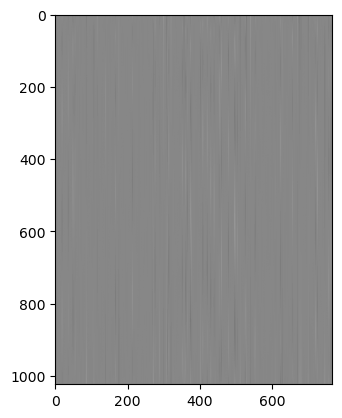

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(state_dict_hugging_face["transformer.wpe.weight"], cmap = "gray")

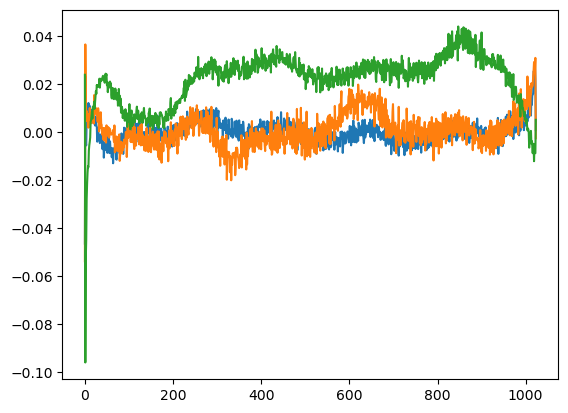

In [9]:
plt.plot(state_dict_hugging_face["transformer.wpe.weight"][:,150])
plt.plot(state_dict_hugging_face["transformer.wpe.weight"][:,200])
plt.plot(state_dict_hugging_face["transformer.wpe.weight"][:,250])

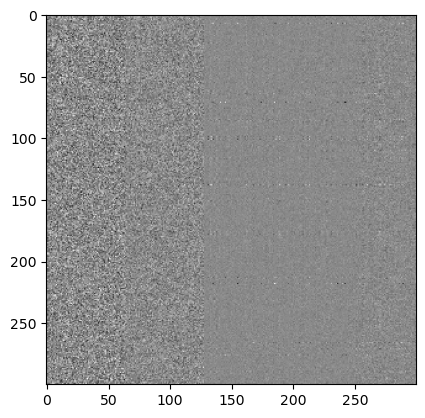

In [10]:
plt.imshow(state_dict_hugging_face["transformer.h.1.attn.c_attn.weight"][:300,:300],cmap="gray")

In [12]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model = 'gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]

In [41]:
with open('data/2ABT_logistic_run_3.txt', 'r') as f:
    text = f.read()
text = text.replace('\n','')
data = text[:100000]
print(data[:100])

RrrrrrLLLLLLLLLLLlLLLLLLLLLLLlLLLLlLLLLLLLLLLLLLlLLLLLLLlllllrlLLLlLLLLLLlLLLlLLLlLLLLLllLllllllLlLl


In [42]:
import numpy as np
print(set(text))

{'R', 'L', 'l', 'r'}


In [43]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(set(tokens))
#Swap this out for simple lookup

{14050, 35972, 21062, 21095, 45895, 297, 43, 75, 81, 49, 7836, 3069}


In [45]:
import torch
buf = torch.tensor(tokens[:24 + 1])
x = buf[:-1].view(4,6)
y = buf[1:].view(4,6)
print(x)
print(y)

tensor([[   49, 21062, 21062,    81,  3069,  3069],
        [ 3069,  3069,  3069,    43,    75,  3069],
        [ 3069,  3069,  3069,  3069,    43,    75],
        [ 3069,  3069,    75,  3069,  3069,  3069]])
tensor([[21062, 21062,    81,  3069,  3069,  3069],
        [ 3069,  3069,    43,    75,  3069,  3069],
        [ 3069,  3069,  3069,    43,    75,  3069],
        [ 3069,    75,  3069,  3069,  3069,  3069]])
